In [1]:
import numpy as np

In [3]:
for model in np.arange(5,27):
    
    metastable_sets = np.load('%d/metastable_sets.npy' % model)
    pi = np.load('%d/pi.npy' % model)
    lifetimes = np.load('%d/lifetimes.npy' % model)
    timescales = np.load('%d/timescales.npy' % model)
    P = np.load('%d/P.npy' % model)

    f = open('stats/%d.txt' % model, 'w')

    f.write('Metastable sets')
    f.write('\n')
    f.write('\n')
    f.write(str(metastable_sets))
    f.write('\n')
    f.write('\n')
    f.write('Stationary distribution')
    f.write('\n')
    f.write('\n')
    f.write(str(pi))
    f.write('\n')
    f.write('\n')
    f.write('Macrostate lifetimes')
    f.write('\n')
    f.write('\n')
    f.write(str(lifetimes))
    f.write('\n')
    f.write('\n')
    f.write('Timescales')
    f.write('\n')
    f.write('\n')
    f.write(str(timescales))

    f.close()

In [4]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11708_11710_SET8_ligands/dih/SAM/hmms/results'

In [5]:
# now network plot the transition matrices

In [8]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
for model in np.arange(5,27):
    plt.figure(dpi=300)
    pyemma.plots.plot_markov_model(np.load('%d/P.npy' % model))
    plt.savefig('network_plots/%d.png' % model, dpi=300)
    plt.close()
    
    plt.figure(dpi=300)
    pyemma.plots.plot_markov_model(np.load('%d/P.npy' % model), arrow_labels=None)
    plt.savefig('network_plots/%d_no_labels.png' % model, dpi=300)
    plt.close()

In [8]:
# also need to make metastable_memberships and observation_probabilities plots, there was an error on running on HAL
# (didn't make the required dirs)

In [9]:
for model in np.arange(5,27):
    observation_probabilities = np.load('%d/observation_probabilities.npy' % model)
    for i in range(len(observation_probabilities)):
        plt.figure(dpi=300)
        plt.scatter(range(len(observation_probabilities[i])), observation_probabilities[i])
        plt.plot(range(len(observation_probabilities[i])), observation_probabilities[i])
        plt.savefig('%d/observation_probabilities/%s.png' % (model, i))
        plt.close()
        
    metastable_memberships = np.load('%d/metastable_memberships.npy' % model)  
    for i in range(len(metastable_memberships)):
        plt.figure(dpi=300)
        plt.plot(range(len(metastable_memberships[i])), metastable_memberships[i])
        plt.scatter(range(len(metastable_memberships[i])), metastable_memberships[i])
        plt.savefig('%d/metastable_memberships/%s.png' % (model,i))
        plt.close()    

In [1]:
#########################


In [2]:
# chose hmm12 - let's plot different flux cutoffs and then MDS embedding

In [4]:
import numpy as np

In [5]:
hmm12_P = np.load("12/P.npy")

In [6]:
hmm12_P

array([[  9.21346714e-001,   0.00000000e+000,   4.87708413e-003,
          1.35840376e-003,   0.00000000e+000,   2.43726928e-002,
          7.84703148e-004,   0.00000000e+000,   0.00000000e+000,
          4.72604019e-002],
       [  0.00000000e+000,   9.42891878e-001,   0.00000000e+000,
          0.00000000e+000,   2.55835348e-002,   0.00000000e+000,
          0.00000000e+000,   1.55402891e-002,   1.59842982e-002,
          0.00000000e+000],
       [  2.85348546e-002,   0.00000000e+000,   8.89217801e-001,
          8.92711368e-004,   0.00000000e+000,   3.03590051e-002,
          7.85146240e-312,   0.00000000e+000,   0.00000000e+000,
          5.09956284e-002],
       [  1.88599782e-002,   0.00000000e+000,   2.11839995e-003,
          8.90549533e-001,   3.89485765e-002,   2.76429703e-002,
          9.53505697e-205,   1.21642894e-137,   7.92819698e-003,
          1.39523446e-002],
       [  0.00000000e+000,   2.28126441e-004,   0.00000000e+000,
          7.10175663e-004,   9.75860362e-00

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/pyemma/plots/networks.py:177: RuntimeWarning: divide by zero encountered in double_scalars
  (_np.max(self.A - _np.diag(_np.diag(self.A))) * _sqrt(n))


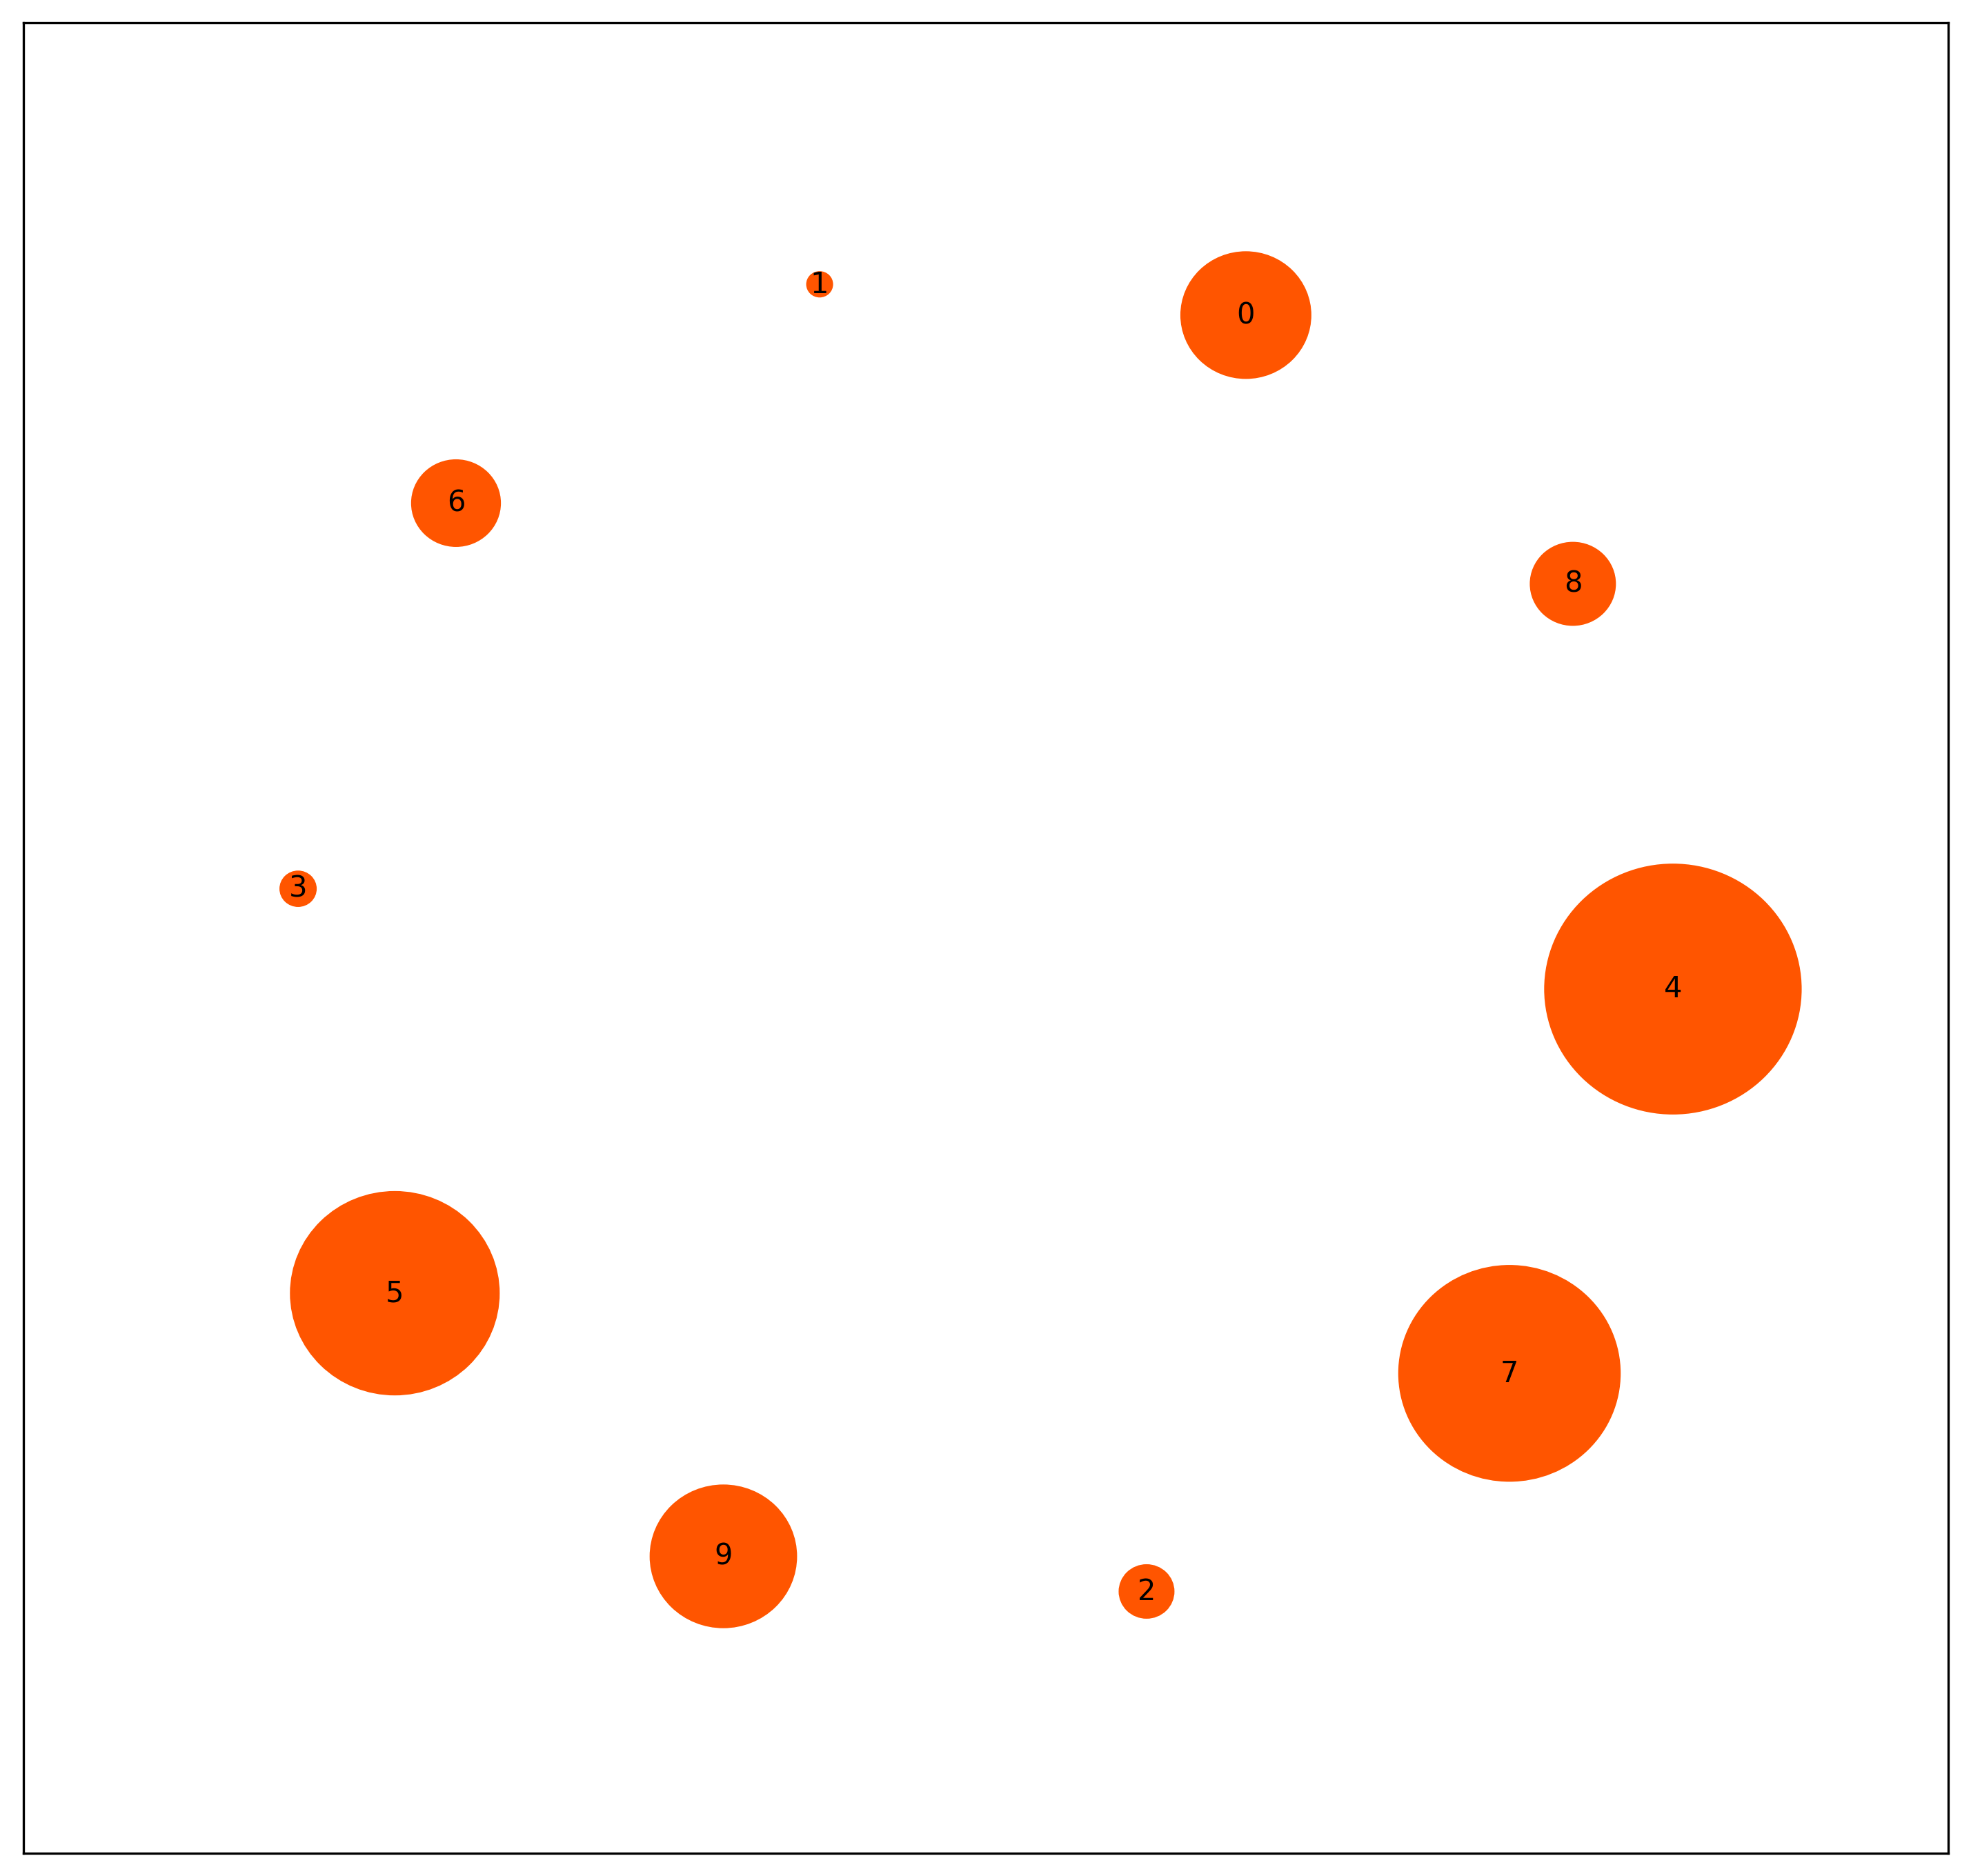

In [15]:
plt.figure(dpi=300)
pyemma.plots.plot_markov_model(hmm12_P, minflux=5e-3, arrow_labels=None, show_frame=True)
plt.show()

In [16]:
a = np.arange(1, 5.1, 0.1)

In [21]:
b = np.arange(1, 9.9, 0.1)

In [22]:
minfluxes = [float('%fe-3' % x) for x in a] + [float('%fe-4' % x) for x in b] + [float('%fe-5' % x) for x in b] + [float('%fe-6' % x) for x in b]

In [23]:
for minflux in minfluxes:
    plt.figure()
    pyemma.plots.plot_markov_model(hmm12_P, minflux=minflux, arrow_labels=None, show_frame=True)
    plt.savefig('hmm12_network_plots_flux/%s.png' % str(minflux), dpi=300)
    plt.close()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/pyemma/plots/networks.py:177: RuntimeWarning: divide by zero encountered in double_scalars
  (_np.max(self.A - _np.diag(_np.diag(self.A))) * _sqrt(n))


In [24]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11708_11710_SET8_ligands/dih/SAM/hmms/results'

In [25]:
# now MDS embedding

In [2]:
import numpy as np
import sklearn
import sklearn.manifold
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

In [2]:
mfpts = np.load('12/hmm12_mfpts.npy')

In [3]:
mfpts.shape

(10, 10)

In [4]:
mfpts_sums = mfpts + mfpts.transpose()

In [5]:
mds = sklearn.manifold.MDS()

In [39]:
# WRONG
#for j in range(50):
#    mds = sklearn.manifold.MDS()
#    mfpts_embed = mds.fit_transform(mfpts_sums)
#    f, ax = plt.subplots(dpi=300)
#    ax.scatter(mfpts_embed[:,0], mfpts_embed[:,1], c='black')
#    for i in range(10):
#        ax.annotate(i, (mfpts_embed[i,0], mfpts_embed[i,1]))
#    plt.savefig('hmm12_mfpt_embedding/%d.png' % j, dpi=300)
#    plt.close()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [1]:
# the above was wrong - the distances are already precomputed!

In [11]:
for j in range(50):
    mds = sklearn.manifold.MDS(dissimilarity='precomputed')
    mfpts_embed = mds.fit_transform(mfpts_sums)
    f, ax = plt.subplots(dpi=300)
    ax.scatter(mfpts_embed[:,0], mfpts_embed[:,1], c='black')
    for i in range(10):
        ax.annotate(i, (mfpts_embed[i,0], mfpts_embed[i,1]))
    plt.savefig('hmm12_mfpt_embedding/%d.png' % j, dpi=300)
    plt.close()

In [12]:
# next thing - use inverse flux instead of MFPT

In [9]:
pi = np.load('12/pi.npy')

In [3]:
P = np.load('12/P.npy')

In [11]:
fluxes = P.T * pi

In [12]:
np.allclose(fluxes, fluxes.T)

True

In [13]:
inverse_fluxes = 1/fluxes

In [14]:
inverse_fluxes_noinf = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        if i == j:
            inverse_fluxes_noinf[i,j] = 0
            continue
        if inverse_fluxes[i,j] == np.inf or inverse_fluxes[i,j] > 1e150:
            inverse_fluxes_noinf[i,j] = 1e150
        else:
            inverse_fluxes_noinf[i,j] = inverse_fluxes[i,j]

In [15]:
for j in range(100):
    mds = sklearn.manifold.MDS(dissimilarity='precomputed')
    inverse_fluxes_embed = mds.fit_transform(inverse_fluxes_noinf)
    np.save('inverse_flux_embedding/save_data/%d.npy' % j, inverse_fluxes_embed)
    with open('inverse_flux_embedding/%d.txt' % j, 'w') as f:
        f.write(str(inverse_fluxes_embed))
    f, ax = plt.subplots(dpi=300)
    ax.scatter(inverse_fluxes_embed[:,0], inverse_fluxes_embed[:,1], c='black')
    for i in range(10):
        ax.annotate(i, (inverse_fluxes_embed[i,0], inverse_fluxes_embed[i,1]))
    plt.savefig('inverse_flux_embedding/%d.png' % j, dpi=300)
    plt.close()

In [42]:
# do a version with diagonal fluxes replaced by 1e150 too

In [16]:
inverse_fluxes_noinf = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        if i == j:
            inverse_fluxes_noinf[i,j] = 1e150
            continue
        if inverse_fluxes[i,j] == np.inf or inverse_fluxes[i,j] > 1e150:
            inverse_fluxes_noinf[i,j] = 1e150
        else:
            inverse_fluxes_noinf[i,j] = inverse_fluxes[i,j]

In [44]:
#mkdir inverse_flux_embedding_

In [46]:
#mkdir inverse_flux_embedding_/save_data

In [17]:
for j in range(100):
    mds = sklearn.manifold.MDS(dissimilarity='precomputed')
    inverse_fluxes_embed = mds.fit_transform(inverse_fluxes_noinf)
    np.save('inverse_flux_embedding_/save_data/%d.npy' % j, inverse_fluxes_embed)
    with open('inverse_flux_embedding_/%d.txt' % j, 'w') as f:
        f.write(str(inverse_fluxes_embed))
    f, ax = plt.subplots(dpi=300)
    ax.scatter(inverse_fluxes_embed[:,0], inverse_fluxes_embed[:,1], c='black')
    for i in range(10):
        ax.annotate(i, (inverse_fluxes_embed[i,0], inverse_fluxes_embed[i,1]))
    plt.savefig('inverse_flux_embedding_/%d.png' % j, dpi=300)
    plt.close()

In [30]:
# diagnose further - we have 3 overlapping with 7 which shouldn't happen
# solved below

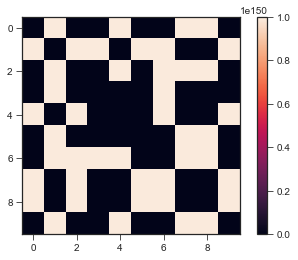

In [31]:
plt.figure()
plt.imshow(inverse_fluxes_noinf)
plt.colorbar()
plt.show()

In [38]:
fluxes[7]

array([  0.00000000e+000,   4.23324186e-005,   0.00000000e+000,
         6.77578866e-140,   4.55339565e-003,   0.00000000e+000,
         0.00000000e+000,   2.22052243e-001,   5.52807736e-004,
         0.00000000e+000])

In [41]:
inverse_fluxes_noinf[7]

array([  1.00000000e+150,   2.36225577e+004,   1.00000000e+150,
         1.47584296e+139,   2.19616321e+002,   1.00000000e+150,
         1.00000000e+150,   0.00000000e+000,   1.80894719e+003,
         1.00000000e+150])

In [ ]:
# gotta remove the diagonal fluxes!!!!! - corrected above

In [1]:
# going back to actually using MFPTs!

In [2]:
import numpy as np

In [3]:
mfpts = np.load('12/hmm12_mfpts.npy')

In [4]:
mfpts_sums = mfpts + mfpts.T

In [3]:
import sklearn
import sklearn.manifold

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('ticks')

In [8]:
for j in range(100):
    mds = sklearn.manifold.MDS(dissimilarity='precomputed')
    mfpt_embed = mds.fit_transform(mfpts_sums)
    np.save('mfpt_embedding/save_data/%d.npy' % j, mfpt_embed)
    with open('mfpt_embedding/%d.txt' % j, 'w') as f:
        f.write(str(mfpt_embed))
    f, ax = plt.subplots(dpi=300)
    ax.scatter(mfpt_embed[:,0], mfpt_embed[:,1], c='black')
    for i in range(10):
        ax.annotate(i, (mfpt_embed[i,0], mfpt_embed[i,1]))
    plt.savefig('mfpt_embedding/%d.png' % j, dpi=300)
    plt.close()

In [6]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11708_11710_SET8_ligands/dih/SAM/hmms/results'

In [1]:
# now we're going to do inverse fluxes again using multiplied transition matrix to avoid zeros
# and log10 of those inverse fluxes
# and log10 of mfpt sums

In [4]:
pi = np.load('12/pi.npy')

In [28]:
P = np.load('12/P.npy')

In [6]:
P_2 = np.linalg.matrix_power(P, 2)

In [7]:
np.count_nonzero(P_2) / (10*10)

0.9

In [29]:
P_3 = np.linalg.matrix_power(P, 3)

In [9]:
np.count_nonzero(P_3) / (10*10)

1.0

In [10]:
fluxes_3 = np.multiply(P_3.T, pi)

In [11]:
inverse_fluxes_3 = 1 / fluxes_3

In [12]:
# set diagonals to 0
for i in range(10):
    inverse_fluxes_3[i,i] = 0

In [15]:
for j in range(100):
    mds = sklearn.manifold.MDS(dissimilarity='precomputed')
    mds_embed = mds.fit_transform(inverse_fluxes_3)
    np.save('inverse_flux_150ns_transmatrix_embedding/save_data/%d.npy' % j, mds_embed)
    with open('inverse_flux_150ns_transmatrix_embedding/%d.txt' % j, 'w') as f:
        f.write(str(mds_embed))
    f, ax = plt.subplots(dpi=300)
    ax.scatter(mds_embed[:,0], mds_embed[:,1], c='black')
    for i in range(10):
        ax.annotate(i, (mds_embed[i,0], mds_embed[i,1]))
    plt.savefig('inverse_flux_150ns_transmatrix_embedding/%d.png' % j, dpi=300)
    plt.close()

In [13]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11708_11710_SET8_ligands/dih/SAM/hmms/results'

In [20]:
inverse_fluxes_3_log = np.log10(1/fluxes_3)

for i in range(10):
    inverse_fluxes_3_log[i,i] = 0

In [22]:
for j in range(100):
    mds = sklearn.manifold.MDS(dissimilarity='precomputed')
    mds_embed = mds.fit_transform(inverse_fluxes_3_log)
    np.save('inverse_flux_150ns_transmatrix_log10_embedding/save_data/%d.npy' % j, mds_embed)
    with open('inverse_flux_150ns_transmatrix_log10_embedding/%d.txt' % j, 'w') as f:
        f.write(str(mds_embed))
    f, ax = plt.subplots(dpi=300)
    ax.scatter(mds_embed[:,0], mds_embed[:,1], c='black')
    for i in range(10):
        ax.annotate(i, (mds_embed[i,0], mds_embed[i,1]))
    plt.savefig('inverse_flux_150ns_transmatrix_log10_embedding/%d.png' % j, dpi=300)
    plt.close()

In [23]:
# now log of mfpts

In [24]:
mfpts = np.load('12/hmm12_mfpts.npy')

In [25]:
mfpts_sums = mfpts + mfpts.T

In [26]:
mfpts_sums_log = np.log10(mfpts_sums)

# change diagonals to zero
for i in range(10):
    mfpts_sums_log[i,i] = 0

In [27]:
for j in range(100):
    mds = sklearn.manifold.MDS(dissimilarity='precomputed')
    mds_embed = mds.fit_transform(mfpts_sums_log)
    np.save('mfpt_log10_embedding/save_data/%d.npy' % j, mds_embed)
    with open('mfpt_log10_embedding/%d.txt' % j, 'w') as f:
        f.write(str(mds_embed))
    f, ax = plt.subplots(dpi=300)
    ax.scatter(mds_embed[:,0], mds_embed[:,1], c='black')
    for i in range(10):
        ax.annotate(i, (mds_embed[i,0], mds_embed[i,1]))
    plt.savefig('mfpt_log10_embedding/%d.png' % j, dpi=300)
    plt.close()

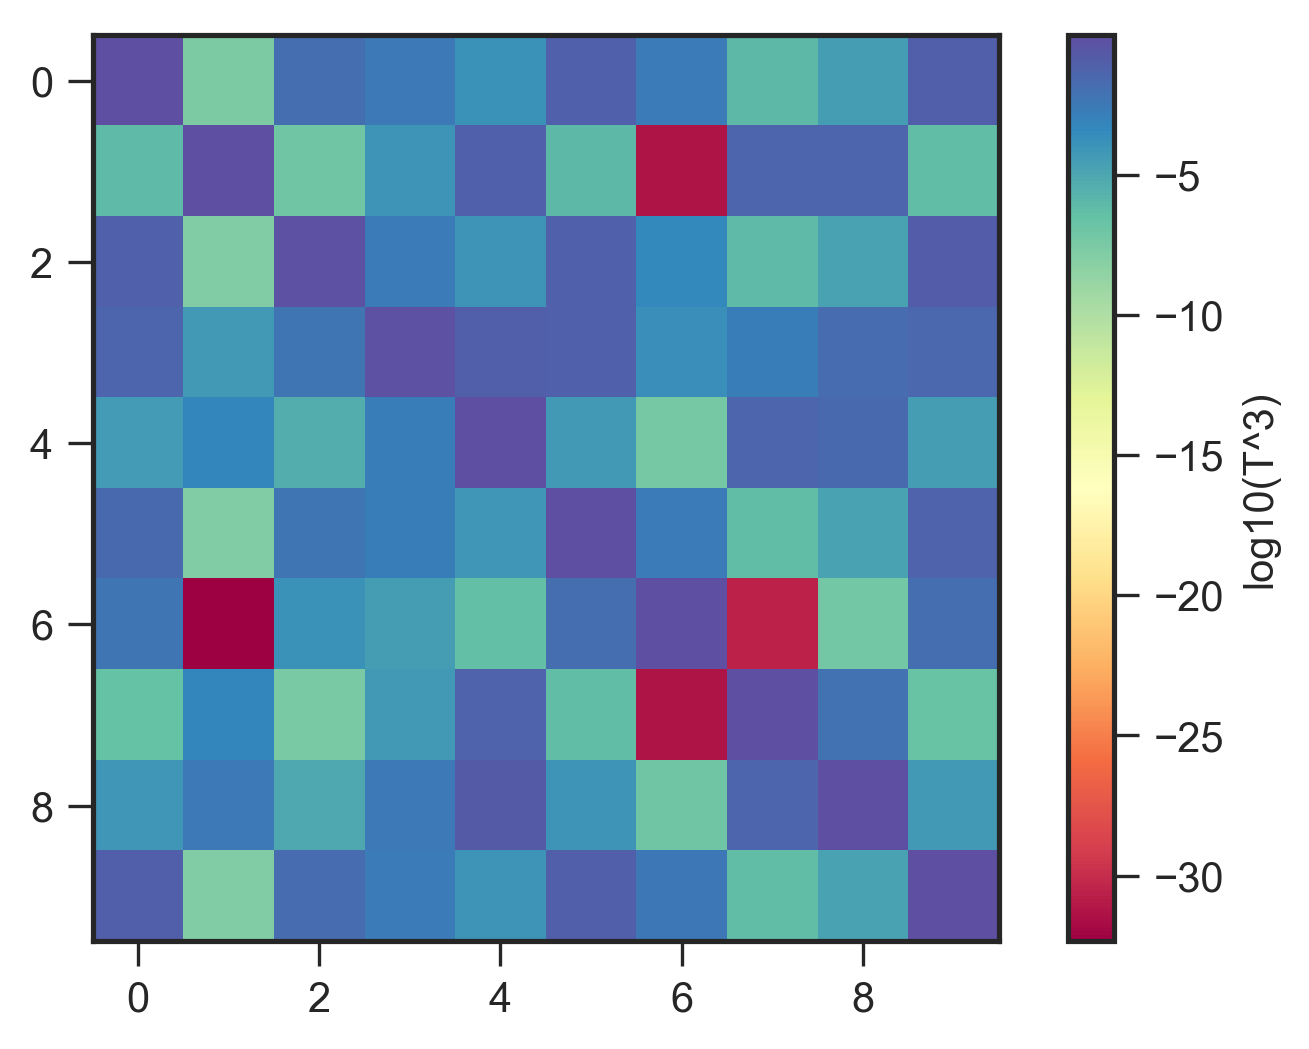

In [30]:
plt.figure(dpi=300)
plt.imshow(np.log10(P_3), cmap='Spectral')
#plt.imshow(P_3, cmap='Blues')
cb = plt.colorbar()
cb.set_label('log10(T^3)')
plt.show()

In [1]:
# save transition matrix to csv

In [4]:
P.shape

(10, 10)

In [5]:
np.savetxt('12/transition_matrix.csv', P, delimiter=",")